# Google Colab Setup

In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

-----

# Original Dataset

## Load Dataset

In [16]:
from scipy.io import arff
import pandas as pd
from sklearn.model_selection import train_test_split

# load dataset
dataset, metadata = arff.loadarff('KDDTrain+.arff')
tr = pd.DataFrame(dataset)

dataset, metadata = arff.loadarff('KDDTest+.arff')
te = pd.DataFrame(dataset)

## Merge train and test set

In [17]:
# redefine train and test set
merged = pd.concat([te, tr], ignore_index=True)
tr, te = train_test_split(merged, test_size=0.2)

# merge sets
tr['train'] = 1
te['train'] = 0
original_df = pd.concat([te, tr])

original_df

<ipython-input-17-fc608ab80852>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr['train'] = 1
<ipython-input-17-fc608ab80852>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te['train'] = 0


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,train
16450,805.0,b'tcp',b'http',b'RSTR',55744.0,1.0,b'0',0.0,0.0,0.0,...,0.99,0.01,0.00,0.00,0.01,0.01,0.64,0.64,b'anomaly',0
107248,0.0,b'icmp',b'ecr_i',b'SF',1480.0,0.0,b'0',1.0,0.0,0.0,...,0.75,0.50,0.75,0.02,0.25,0.00,0.00,0.00,b'anomaly',0
62074,0.0,b'tcp',b'http',b'SF',176.0,4578.0,b'0',0.0,0.0,0.0,...,1.00,0.00,0.33,0.02,0.00,0.00,0.00,0.00,b'normal',0
119629,7.0,b'udp',b'private',b'SF',105.0,146.0,b'0',0.0,0.0,0.0,...,0.91,0.01,0.01,0.00,0.00,0.00,0.00,0.00,b'normal',0
10582,0.0,b'tcp',b'systat',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,0.00,0.04,0.00,0.00,0.67,1.00,0.00,0.00,b'anomaly',0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118293,0.0,b'tcp',b'http',b'SF',208.0,1187.0,b'0',0.0,0.0,0.0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'normal',1
108136,0.0,b'tcp',b'uucp',b'RSTO',0.0,0.0,b'0',0.0,0.0,0.0,...,0.02,0.06,0.00,0.00,0.00,0.00,1.00,1.00,b'anomaly',1
1344,0.0,b'tcp',b'ftp_data',b'SF',9.0,0.0,b'0',0.0,0.0,0.0,...,0.16,0.02,0.16,0.00,0.55,0.00,0.02,0.00,b'normal',1
96747,0.0,b'icmp',b'ecr_i',b'SF',1032.0,0.0,b'0',0.0,0.0,0.0,...,0.44,0.02,0.44,0.00,0.01,0.00,0.02,0.00,b'anomaly',1


In [18]:
for c in original_df.columns:
    print(c)

duration
protocol_type
service
flag
src_bytes
dst_bytes
land
wrong_fragment
urgent
hot
num_failed_logins
logged_in
num_compromised
root_shell
su_attempted
num_root
num_file_creations
num_shells
num_access_files
num_outbound_cmds
is_host_login
is_guest_login
count
srv_count
serror_rate
srv_serror_rate
rerror_rate
srv_rerror_rate
same_srv_rate
diff_srv_rate
srv_diff_host_rate
dst_host_count
dst_host_srv_count
dst_host_same_srv_rate
dst_host_diff_srv_rate
dst_host_same_src_port_rate
dst_host_srv_diff_host_rate
dst_host_serror_rate
dst_host_srv_serror_rate
dst_host_rerror_rate
dst_host_srv_rerror_rate
class
train


# Clean dataset

## Divide column types (categorical, binary, discrete, continuous)

In [19]:
coldict = {
    "categorical": [
        'protocol_type',
        'flag',
        'service',
        'su_attempted',
        'wrong_fragment',
        'urgent'
    ],
    "binary": [
        'land',
        'logged_in',
        'root_shell',
        'is_host_login',
        'is_guest_login'
    ],
    "discrete": [
        'duration',
        'src_bytes',
        'dst_bytes',
        'hot',
        'num_failed_logins',
        'num_compromised',
        'num_root',
        'num_file_creations',
        'num_shells',
        'num_access_files',
        'count',
        'srv_count',
        'dst_host_count',
        'dst_host_srv_count',
    ],
    "continuous": [
        'serror_rate',
        'srv_serror_rate',
        'rerror_rate',
        'srv_rerror_rate',
        'same_srv_rate',
        'diff_srv_rate',
        'srv_diff_host_rate',
        'dst_host_same_srv_rate',
        'dst_host_diff_srv_rate',
        'dst_host_same_src_port_rate',
        'dst_host_srv_diff_host_rate',
        'dst_host_serror_rate',
        'dst_host_srv_serror_rate',
        'dst_host_rerror_rate',
        'dst_host_srv_rerror_rate'
    ]
}

coldict['numerical'] = (coldict['discrete'] + coldict['continuous'])

for cols in original_df.columns:
    if (cols not in coldict['categorical']) and (cols not in coldict['binary']) and (cols not in coldict['continuous']) and (cols not in coldict['discrete']):
        print(cols)
        # print(i)
        # print(cols)
        # print("---------")
        # i += 1
        # print(original_df[cols][:10])


num_outbound_cmds
class
train


## Decode strings to utf-8

In [20]:
# use utf8 for strings
string_cols = []
for c in original_df.select_dtypes(include='object'):
  original_df[c] = original_df[c].str.decode('utf-8')
  string_cols.append(c)

original_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,train
16450,805.0,tcp,http,RSTR,55744.0,1.0,0,0.0,0.0,0.0,...,0.99,0.01,0.00,0.00,0.01,0.01,0.64,0.64,anomaly,0
107248,0.0,icmp,ecr_i,SF,1480.0,0.0,0,1.0,0.0,0.0,...,0.75,0.50,0.75,0.02,0.25,0.00,0.00,0.00,anomaly,0
62074,0.0,tcp,http,SF,176.0,4578.0,0,0.0,0.0,0.0,...,1.00,0.00,0.33,0.02,0.00,0.00,0.00,0.00,normal,0
119629,7.0,udp,private,SF,105.0,146.0,0,0.0,0.0,0.0,...,0.91,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,0
10582,0.0,tcp,systat,S0,0.0,0.0,0,0.0,0.0,0.0,...,0.00,0.04,0.00,0.00,0.67,1.00,0.00,0.00,anomaly,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118293,0.0,tcp,http,SF,208.0,1187.0,0,0.0,0.0,0.0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1
108136,0.0,tcp,uucp,RSTO,0.0,0.0,0,0.0,0.0,0.0,...,0.02,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly,1
1344,0.0,tcp,ftp_data,SF,9.0,0.0,0,0.0,0.0,0.0,...,0.16,0.02,0.16,0.00,0.55,0.00,0.02,0.00,normal,1
96747,0.0,icmp,ecr_i,SF,1032.0,0.0,0,0.0,0.0,0.0,...,0.44,0.02,0.44,0.00,0.01,0.00,0.02,0.00,anomaly,1


In [21]:
string_cols

['protocol_type',
 'service',
 'flag',
 'land',
 'logged_in',
 'root_shell',
 'su_attempted',
 'is_host_login',
 'is_guest_login',
 'class']

## Decode categorical as ints

In [22]:
for c in coldict["categorical"]:
  if c not in string_cols:
    original_df[c] = original_df[c].astype('int')

original_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,train
16450,805.0,tcp,http,RSTR,55744.0,1.0,0,0,0,0.0,...,0.99,0.01,0.00,0.00,0.01,0.01,0.64,0.64,anomaly,0
107248,0.0,icmp,ecr_i,SF,1480.0,0.0,0,1,0,0.0,...,0.75,0.50,0.75,0.02,0.25,0.00,0.00,0.00,anomaly,0
62074,0.0,tcp,http,SF,176.0,4578.0,0,0,0,0.0,...,1.00,0.00,0.33,0.02,0.00,0.00,0.00,0.00,normal,0
119629,7.0,udp,private,SF,105.0,146.0,0,0,0,0.0,...,0.91,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,0
10582,0.0,tcp,systat,S0,0.0,0.0,0,0,0,0.0,...,0.00,0.04,0.00,0.00,0.67,1.00,0.00,0.00,anomaly,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118293,0.0,tcp,http,SF,208.0,1187.0,0,0,0,0.0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1
108136,0.0,tcp,uucp,RSTO,0.0,0.0,0,0,0,0.0,...,0.02,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly,1
1344,0.0,tcp,ftp_data,SF,9.0,0.0,0,0,0,0.0,...,0.16,0.02,0.16,0.00,0.55,0.00,0.02,0.00,normal,1
96747,0.0,icmp,ecr_i,SF,1032.0,0.0,0,0,0,0.0,...,0.44,0.02,0.44,0.00,0.01,0.00,0.02,0.00,anomaly,1


In [23]:
original_df.urgent.unique()

array([0, 1, 2, 3])

## Rename HTTP_XXX

In [122]:
# replace all http_XXX service strings with simply http
original_df = original_df.replace('http_8001', 'http', regex=False)
original_df = original_df.replace('http_2784', 'http', regex=False)
original_df = original_df.replace('http_443', 'http', regex=False)

original_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,train
0,0.0,tcp,private,REJ,0.0,0.0,0,0,0,0.0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly,0
1,0.0,tcp,private,REJ,0.0,0.0,0,0,0,0.0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly,0
2,2.0,tcp,ftp_data,SF,12983.0,0.0,0,0,0,0.0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,0
3,0.0,icmp,eco_i,SF,20.0,0.0,0,0,0,0.0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,anomaly,0
4,1.0,tcp,telnet,RSTO,0.0,15.0,0,0,0,0.0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,anomaly,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,tcp,private,S0,0.0,0.0,0,0,0,0.0,...,0.10,0.06,0.00,0.00,1.00,1.0,0.00,0.00,anomaly,1
125969,8.0,udp,private,SF,105.0,145.0,0,0,0,0.0,...,0.96,0.01,0.01,0.00,0.00,0.0,0.00,0.00,normal,1
125970,0.0,tcp,smtp,SF,2231.0,384.0,0,0,0,0.0,...,0.12,0.06,0.00,0.00,0.72,0.0,0.01,0.00,normal,1
125971,0.0,tcp,klogin,S0,0.0,0.0,0,0,0,0.0,...,0.03,0.05,0.00,0.00,1.00,1.0,0.00,0.00,anomaly,1


## Drop num_outbound_cmds

In [24]:
import pandas as pd

pd.value_counts(original_df['num_outbound_cmds']).index.values

array([0.])

In [25]:
original_df = original_df.drop(columns='num_outbound_cmds')

original_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,train
16450,805.0,tcp,http,RSTR,55744.0,1.0,0,0,0,0.0,...,0.99,0.01,0.00,0.00,0.01,0.01,0.64,0.64,anomaly,0
107248,0.0,icmp,ecr_i,SF,1480.0,0.0,0,1,0,0.0,...,0.75,0.50,0.75,0.02,0.25,0.00,0.00,0.00,anomaly,0
62074,0.0,tcp,http,SF,176.0,4578.0,0,0,0,0.0,...,1.00,0.00,0.33,0.02,0.00,0.00,0.00,0.00,normal,0
119629,7.0,udp,private,SF,105.0,146.0,0,0,0,0.0,...,0.91,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,0
10582,0.0,tcp,systat,S0,0.0,0.0,0,0,0,0.0,...,0.00,0.04,0.00,0.00,0.67,1.00,0.00,0.00,anomaly,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118293,0.0,tcp,http,SF,208.0,1187.0,0,0,0,0.0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,1
108136,0.0,tcp,uucp,RSTO,0.0,0.0,0,0,0,0.0,...,0.02,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly,1
1344,0.0,tcp,ftp_data,SF,9.0,0.0,0,0,0,0.0,...,0.16,0.02,0.16,0.00,0.55,0.00,0.02,0.00,normal,1
96747,0.0,icmp,ecr_i,SF,1032.0,0.0,0,0,0,0.0,...,0.44,0.02,0.44,0.00,0.01,0.00,0.02,0.00,anomaly,1


## Save Train/Test sets

In [26]:
from sklearn.model_selection import train_test_split

traindf = original_df.loc[original_df['train'] == 1]
testdf = original_df.loc[original_df['train'] == 0]

#train, test = train_test_split(original_df, test_size=0.2)
train = traindf.drop('train',axis=1)
test = testdf.drop('train',axis=1)

train.to_pickle('train.pkl')
test.to_pickle('test.pkl')


In [ ]:
# del original_df
# del train
# del test
# del tr
# del te
# del traindf
# del testdf

# Analysis

## Load Train/Test

In [27]:
import pandas as pd

# load dataset
train = pd.read_pickle('train.pkl')
test  = pd.read_pickle('test.pkl')

In [28]:
train['train'] = 1
test['train'] = 0
merged_df = pd.concat([train, test], ignore_index=True)

merged_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,train
0,0.0,tcp,http,SF,313.0,2531.0,0,0,0,0.0,...,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,normal,1
1,0.0,tcp,Z39_50,S0,0.0,0.0,0,0,0,0.0,...,0.04,0.08,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,1
2,27.0,tcp,ftp,SF,928.0,2720.0,0,0,0,19.0,...,1.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,normal,1
3,0.0,tcp,printer,S0,0.0,0.0,0,0,0,0.0,...,0.04,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,1
4,28.0,tcp,ftp,SF,1067.0,3081.0,0,0,0,22.0,...,0.23,0.04,0.01,0.00,0.01,0.00,0.00,0.00,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0.0,tcp,http,SF,277.0,5376.0,0,0,0,0.0,...,1.00,0.00,0.04,0.04,0.00,0.00,0.00,0.00,normal,0
148513,0.0,tcp,private,S0,0.0,0.0,0,0,0,0.0,...,0.03,0.08,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,0
148514,0.0,tcp,http,S0,0.0,0.0,0,0,0,0.0,...,1.00,0.00,0.00,0.00,0.58,0.58,0.39,0.39,anomaly,0
148515,0.0,icmp,eco_i,SF,8.0,0.0,0,0,0,0.0,...,1.00,0.00,1.00,0.50,0.00,0.00,0.00,0.00,anomaly,0


## Target

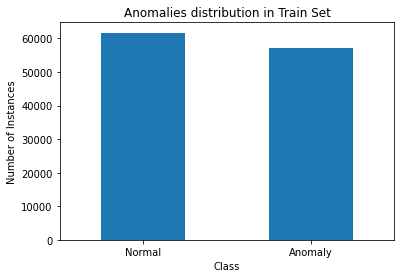

In [29]:
import matplotlib.pyplot as plt

LABELS = ["Normal", "Anomaly"]


count_classes = pd.value_counts(train['class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)

plt.title("Anomalies distribution in Train Set")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Number of Instances")

plt.savefig("figs/class_train.png", bbox_inches='tight')

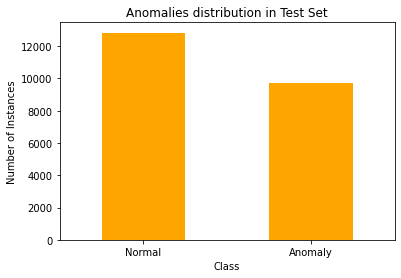

In [129]:
count_classes = pd.value_counts(test['class'], sort = True)
count_classes.plot(kind = 'bar', rot=0, color='orange')

plt.title("Anomalies distribution in Test Set")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.savefig("figs/class_test.png", bbox_inches='tight')

## Categorical

protocol_type
flag
su_attempted
wrong_fragment
urgent


ValueError: shape mismatch: objects cannot be broadcast to a single shape

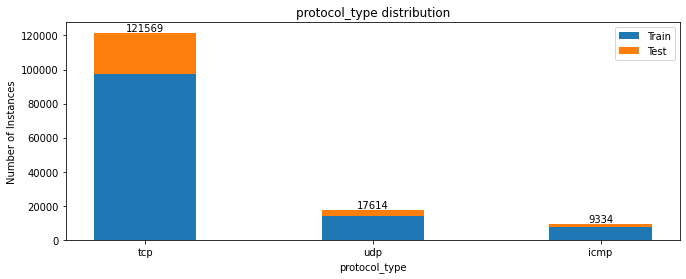

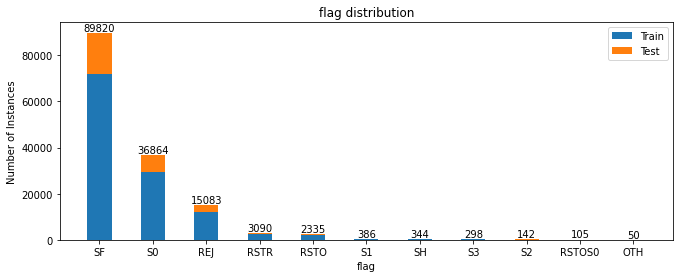

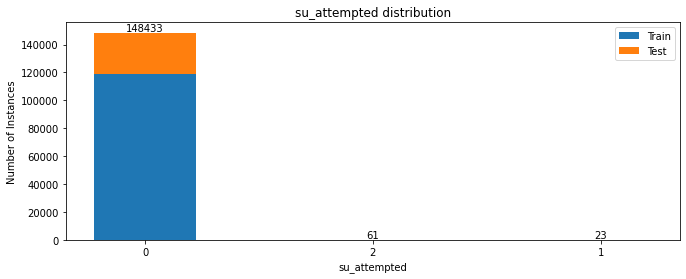

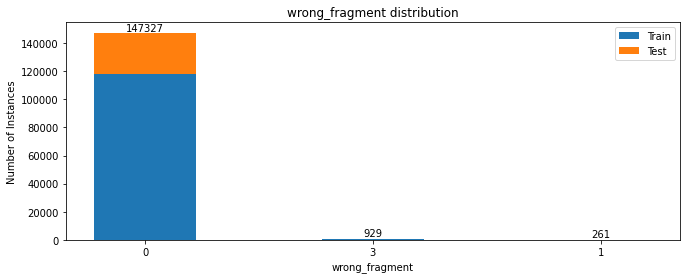

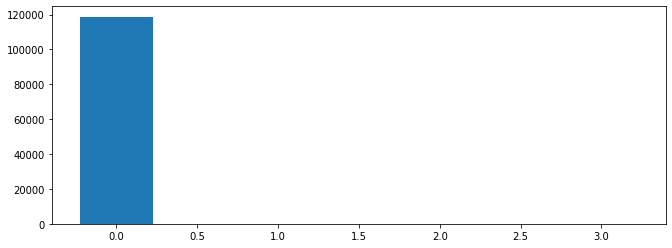

In [30]:
import numpy as np
import matplotlib.pyplot as plt

for c in coldict['categorical']:
    if c == 'service':
        continue
    print(c)
    LABELS = pd.value_counts(train[c]).index.values

    N = len(LABELS)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.45       # the width of the bars: can also be len(x) sequence

    plt.figure(figsize=(11, 4))

    p1 = plt.bar(ind, pd.value_counts(train[c]), width)
    p2 = plt.bar(ind, pd.value_counts(test[c]), width,
                bottom=pd.value_counts(train[c]))

    plt.legend([p1,p2],["Train", "Test"])
    plt.xlabel(c)
    plt.ylabel("Number of Instances")
    plt.title(c + ' distribution')
    plt.xticks(range(N), LABELS)

    for r1,r2 in zip(p1,p2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x()+r1.get_width()/2., h1+h2, '%s'% (h1+h2), ha = 'center', va='bottom')

    # plt.show()
    plt.savefig("figs/"+c+".png", bbox_inches='tight')

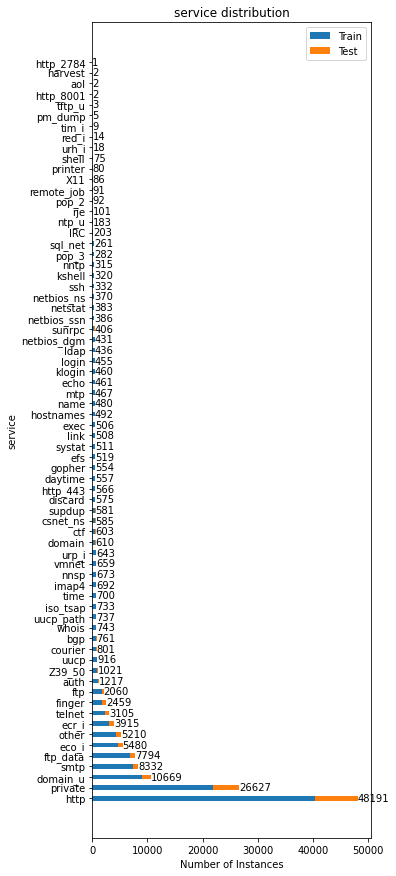

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# ['flag','service]:

c = 'service'
plt.figure(figsize=(5, 15))
width = 0.45

train_vals = pd.value_counts(train[c])
test_vals  = pd.value_counts(test[c])

for v in train_vals.index.values:
  if v not in test_vals.index.values:
    test_vals[v] = 0

for v in test_vals.index.values:
  if v not in train_vals.index.values:
    train_vals[v] = 0


LABELS = train_vals.index.values

N = len(LABELS)
ind = np.arange(N)    # the x locations for the groups
width = 0.45       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, train_vals, width)
p2 = plt.barh(ind, test_vals, width, left=train_vals)

plt.legend([p1,p2],["Train", "Test"])
plt.ylabel(c)
plt.xlabel("Number of Instances")
plt.title(c + ' distribution')
plt.yticks(range(N), LABELS)

for r1,r2 in zip(p1,p2):
    h1 = r1.get_width()
    h2 = r2.get_width()
    plt.text(h1+h2, r1.get_y()+r1.get_height()/2., '%s'% (h1+h2), ha = 'left', va='center')

plt.savefig("figs/"+c+".png", bbox_inches='tight')

## Binary

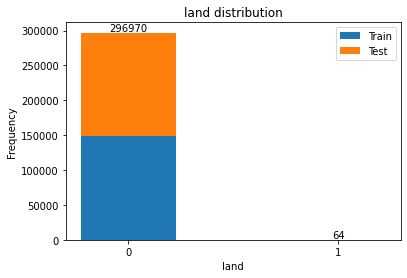

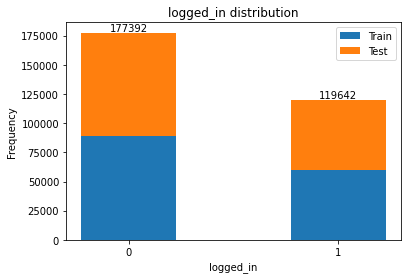

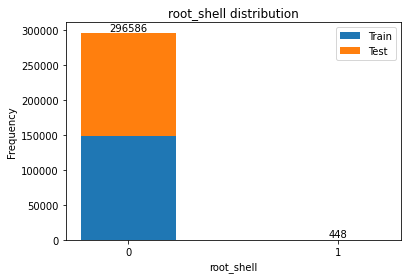

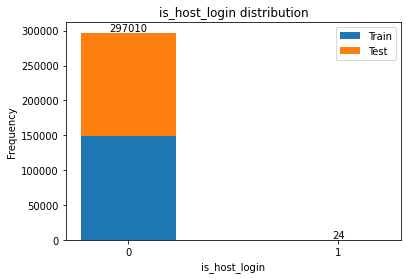

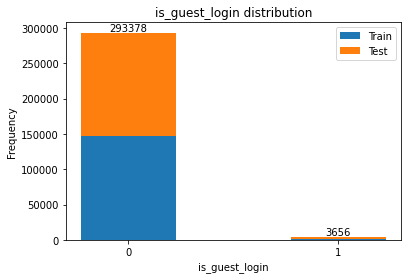

In [105]:
import numpy as np
import matplotlib.pyplot as plt


for c in coldict['binary']:
  LABELS = pd.value_counts(original_df[c]).index.values

  N = len(LABELS)
  ind = np.arange(N)    # the x locations for the groups
  width = 0.45       # the width of the bars: can also be len(x) sequence

  plt.figure()
  p1 = plt.bar(ind, pd.value_counts(original_df[c]), width)
  p2 = plt.bar(ind, pd.value_counts(original_df[c]), width,
              bottom=pd.value_counts(original_df[c]))

  plt.legend([p1,p2],["Train", "Test"])
  plt.xlabel(c)
  plt.ylabel("Frequency")
  plt.title(c + ' distribution')
  plt.xticks(range(N), LABELS)

  for r1,r2 in zip(p1,p2):
      h1 = r1.get_height()
      h2 = r2.get_height()
      plt.text(r1.get_x()+r1.get_width()/2., h1+h2, '%s'% (h1+h2), ha = 'center', va='bottom')

  plt.savefig("figs/"+c+".png", bbox_inches='tight')

## Numerical

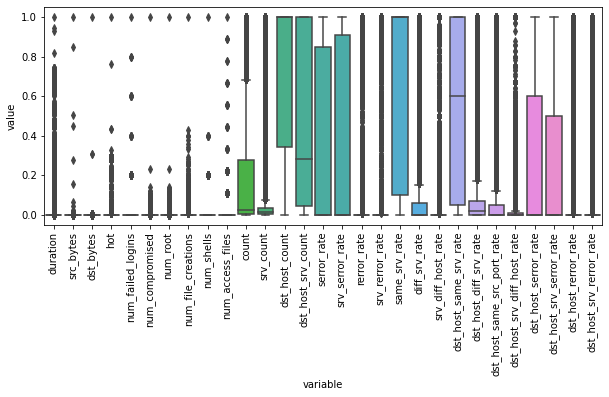

In [31]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

normalized_df = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(merged_df[coldict["numerical"]]))

plt.figure(figsize=(10, 4))

df = normalized_df

sns.boxplot(x="variable", y="value", data=pd.melt(df))

index = np.arange(len(coldict["numerical"]))
plt.xticks(index, coldict["numerical"], rotation=90)
plt.show()

duration
src_bytes
dst_bytes
hot
num_failed_logins
num_compromised
num_root
num_file_creations
num_shells
num_access_files
count
srv_count
dst_host_count
dst_host_srv_count


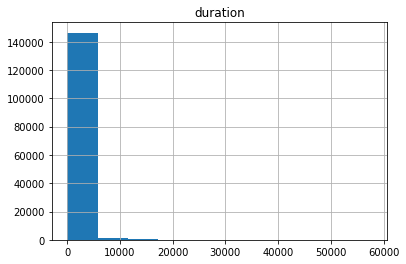

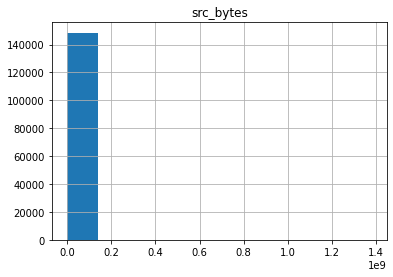

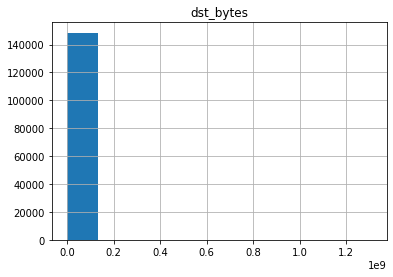

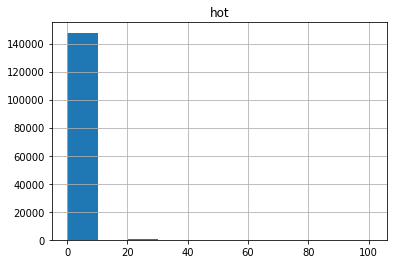

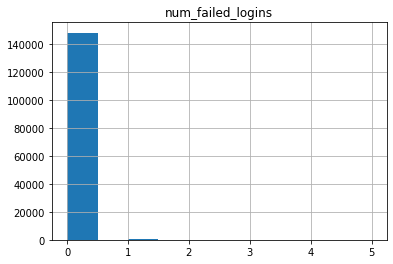

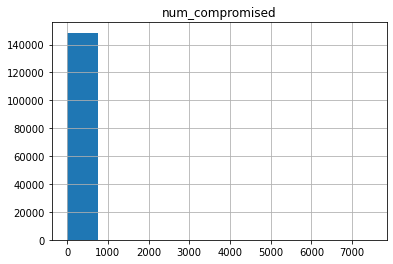

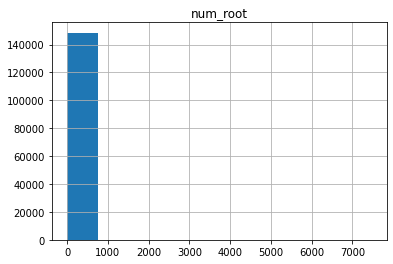

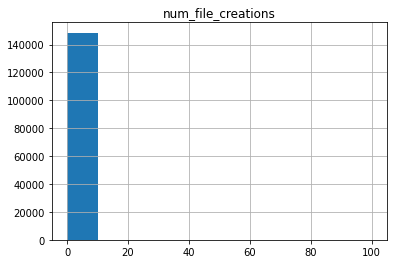

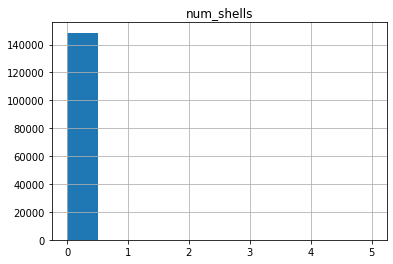

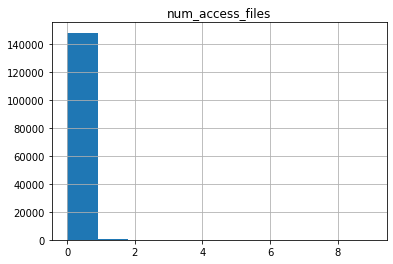

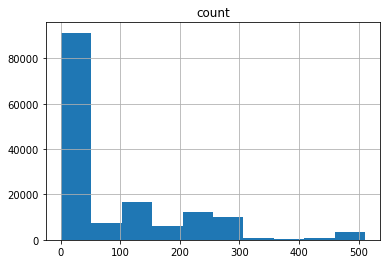

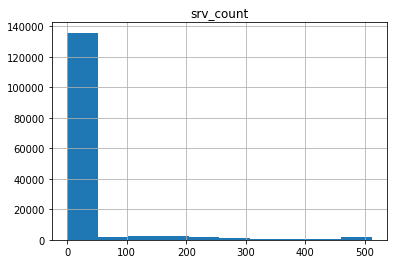

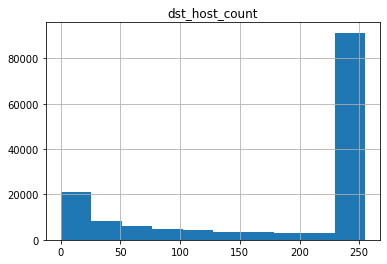

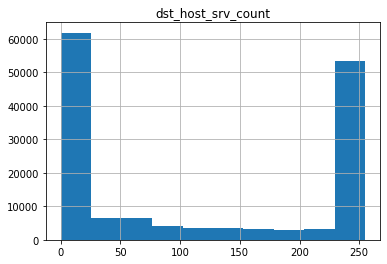

In [50]:
for c in coldict["discrete"]:
    print(c)
    merged_df.hist(column=c)


## Visualize normalization

In [32]:
import random

scaler = preprocessing.Normalizer()
r = random.sample(range(merged_df.shape[0]), merged_df.shape[0])
new = merged_df.copy(deep=True)
new[coldict["discrete"]] = scaler.fit_transform(new[coldict["discrete"]])

In [ ]:
for c in ["src_bytes","dst_host_count"]:
    plt.figure()
    plt.title("Distribution of " + c + " before normalization")
    plt.ylabel("Value")
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    
    scatter = plt.scatter(r, merged_df[c], c=[x for x in merged_df["class"]], alpha=0.2)
    
    plt.legend(handles=scatter.legend_elements()[0], labels=["anomaly","normal"])
    plt.savefig("figs/" + c +"_before_norm.png", bbox_inches='tight')

    plt.figure()
    plt.title("Distribution of " + c + " after normalization")
    plt.ylabel("Value")
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)

    scatter = plt.scatter(r, new[c], c=[x for x in new["class"]], alpha=0.2)
    
    plt.legend(handles=scatter.legend_elements()[0], labels=["anomaly","normal"])
    plt.savefig("figs/" + c +"_after_norm.png", bbox_inches='tight')

# Transform

## Categories to numbers

In [34]:
categories_dict = {}

for c in (coldict['categorical'] + ['class']):
  # change object columns to categorical
  merged_df[c] = pd.Categorical(merged_df[c])

  with pd.option_context("display.max_rows", 1000):
    categories_dict[c] = pd.DataFrame(merged_df[c].cat.categories.values, columns=[c])

  # substitute categories with integer values
  merged_df[c] = merged_df[c].cat.codes

categories_dict

{'protocol_type':   protocol_type
 0          icmp
 1           tcp
 2           udp,
 'flag':       flag
 0      OTH
 1      REJ
 2     RSTO
 3   RSTOS0
 4     RSTR
 5       S0
 6       S1
 7       S2
 8       S3
 9       SF
 10      SH,
 'service':       service
 0         IRC
 1         X11
 2      Z39_50
 3         aol
 4        auth
 ..        ...
 65      urp_i
 66       uucp
 67  uucp_path
 68      vmnet
 69      whois
 
 [70 rows x 1 columns],
 'su_attempted':   su_attempted
 0            0
 1            1
 2            2,
 'wrong_fragment':    wrong_fragment
 0               0
 1               1
 2               3,
 'urgent':    urgent
 0       0
 1       1
 2       2
 3       3,
 'class':      class
 0  anomaly
 1   normal}

In [35]:
merged_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,train
0,0.0,1,24,9,313.0,2531.0,0,0,0,0.0,...,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,1,1
1,0.0,1,2,5,0.0,0.0,0,0,0,0.0,...,0.04,0.08,0.00,0.00,1.00,1.00,0.00,0.00,0,1
2,27.0,1,19,9,928.0,2720.0,0,0,0,19.0,...,1.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,1,1
3,0.0,1,48,5,0.0,0.0,0,0,0,0.0,...,0.04,0.07,0.00,0.00,1.00,1.00,0.00,0.00,0,1
4,28.0,1,19,9,1067.0,3081.0,0,0,0,22.0,...,0.23,0.04,0.01,0.00,0.01,0.00,0.00,0.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0.0,1,24,9,277.0,5376.0,0,0,0,0.0,...,1.00,0.00,0.04,0.04,0.00,0.00,0.00,0.00,1,0
148513,0.0,1,49,5,0.0,0.0,0,0,0,0.0,...,0.03,0.08,0.00,0.00,1.00,1.00,0.00,0.00,0,0
148514,0.0,1,24,5,0.0,0.0,0,0,0,0.0,...,1.00,0.00,0.00,0.00,0.58,0.58,0.39,0.39,0,0
148515,0.0,0,14,9,8.0,0.0,0,0,0,0.0,...,1.00,0.00,1.00,0.50,0.00,0.00,0.00,0.00,0,0


## One-Hot Encoding

In [36]:
onehot_df = merged_df

# for each category create n columns with name "<category>_<value>"
for c in coldict["categorical"]:
  if (len(merged_df[c].unique()) <= 2) and (c != 'class'):
    print("Skipping " + c + " since it's a binary column")

  else:
    print("Encoding " + c + " with one hot")
    onehot_df[c] = pd.Categorical(merged_df[c])
    dfDummies = pd.get_dummies(onehot_df[c], prefix = c)
    onehot_df = pd.concat([onehot_df, dfDummies], axis=1)

    del onehot_df[c]

print('One Hot encoded dataset:\n')
onehot_df

Encoding protocol_type with one hot
Encoding flag with one hot
Encoding service with one hot
Encoding su_attempted with one hot
Encoding wrong_fragment with one hot
Encoding urgent with one hot
One Hot encoded dataset:



,duration,src_bytes,dst_bytes,land,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,...,su_attempted_0,su_attempted_1,su_attempted_2,wrong_fragment_0,wrong_fragment_1,wrong_fragment_2,urgent_0,urgent_1,urgent_2,urgent_3
0,0.0,313.0,2531.0,0,0.0,0.0,1,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
1,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
2,27.0,928.0,2720.0,0,19.0,0.0,1,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
3,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
4,28.0,1067.0,3081.0,0,22.0,0.0,1,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0.0,277.0,5376.0,0,0.0,0.0,1,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
148513,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
148514,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
148515,0.0,8.0,0.0,0,0.0,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0


In [37]:
encoded_columns = {}

for c in onehot_df.columns:
    if ("service" in c) or ("flag" in c) or ("protocol_type" in c):
        num = int(c.split("_")[-1])
        name = '_'.join(c.split("_")[0:-1])
        stringed_name = categories_dict[name].iloc[num].iloc[0]
        encoded_columns[c] = name + "_" + stringed_name

encoded_columns['class'] = 'class'
encoded_columns

{'protocol_type_0': 'protocol_type_icmp',
 'protocol_type_1': 'protocol_type_tcp',
 'protocol_type_2': 'protocol_type_udp',
 'flag_0': 'flag_OTH',
 'flag_1': 'flag_REJ',
 'flag_2': 'flag_RSTO',
 'flag_3': 'flag_RSTOS0',
 'flag_4': 'flag_RSTR',
 'flag_5': 'flag_S0',
 'flag_6': 'flag_S1',
 'flag_7': 'flag_S2',
 'flag_8': 'flag_S3',
 'flag_9': 'flag_SF',
 'flag_10': 'flag_SH',
 'service_0': 'service_IRC',
 'service_1': 'service_X11',
 'service_2': 'service_Z39_50',
 'service_3': 'service_aol',
 'service_4': 'service_auth',
 'service_5': 'service_bgp',
 'service_6': 'service_courier',
 'service_7': 'service_csnet_ns',
 'service_8': 'service_ctf',
 'service_9': 'service_daytime',
 'service_10': 'service_discard',
 'service_11': 'service_domain',
 'service_12': 'service_domain_u',
 'service_13': 'service_echo',
 'service_14': 'service_eco_i',
 'service_15': 'service_ecr_i',
 'service_16': 'service_efs',
 'service_17': 'service_exec',
 'service_18': 'service_finger',
 'service_19': 'service_f

## Correlations

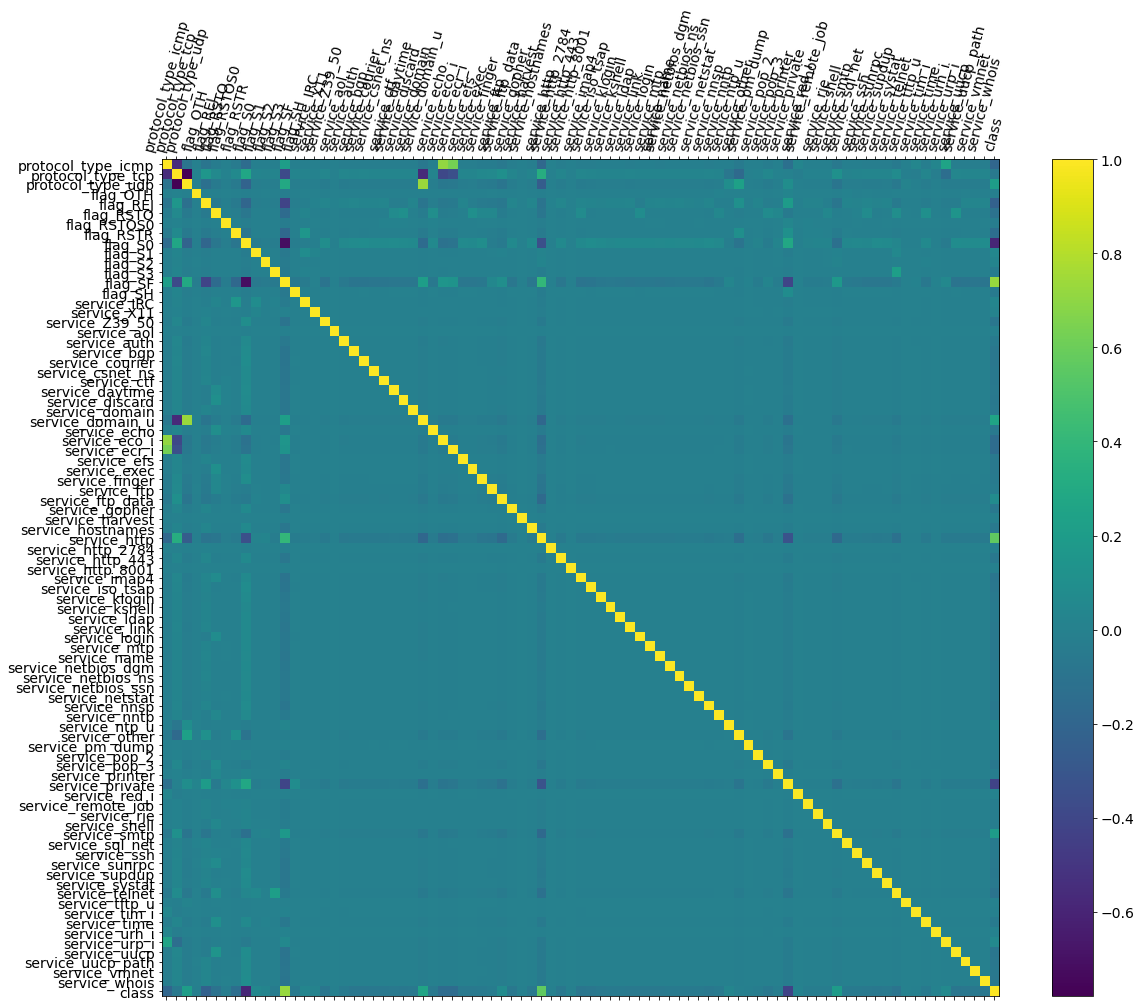

In [243]:
corr_df = onehot_df[list(encoded_columns.keys())]

f = plt.figure(figsize=(19, 15))
plt.matshow(corr_df.corr(), fignum=f.number)
plt.xticks(range(corr_df.shape[1]),[encoded_columns[x] for x in corr_df.columns], fontsize=14, rotation=75)
plt.yticks(range(corr_df.shape[1]), [encoded_columns[x] for x in corr_df.columns], fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);

In [153]:
corr_df

,protocol_type_0,protocol_type_1,protocol_type_2,flag_0,flag_1,flag_2,flag_3,flag_4,flag_5,flag_6,...,service_61,service_62,service_63,service_64,service_65,service_66,service_67,service_68,service_69,class
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
148513,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
148514,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148515,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


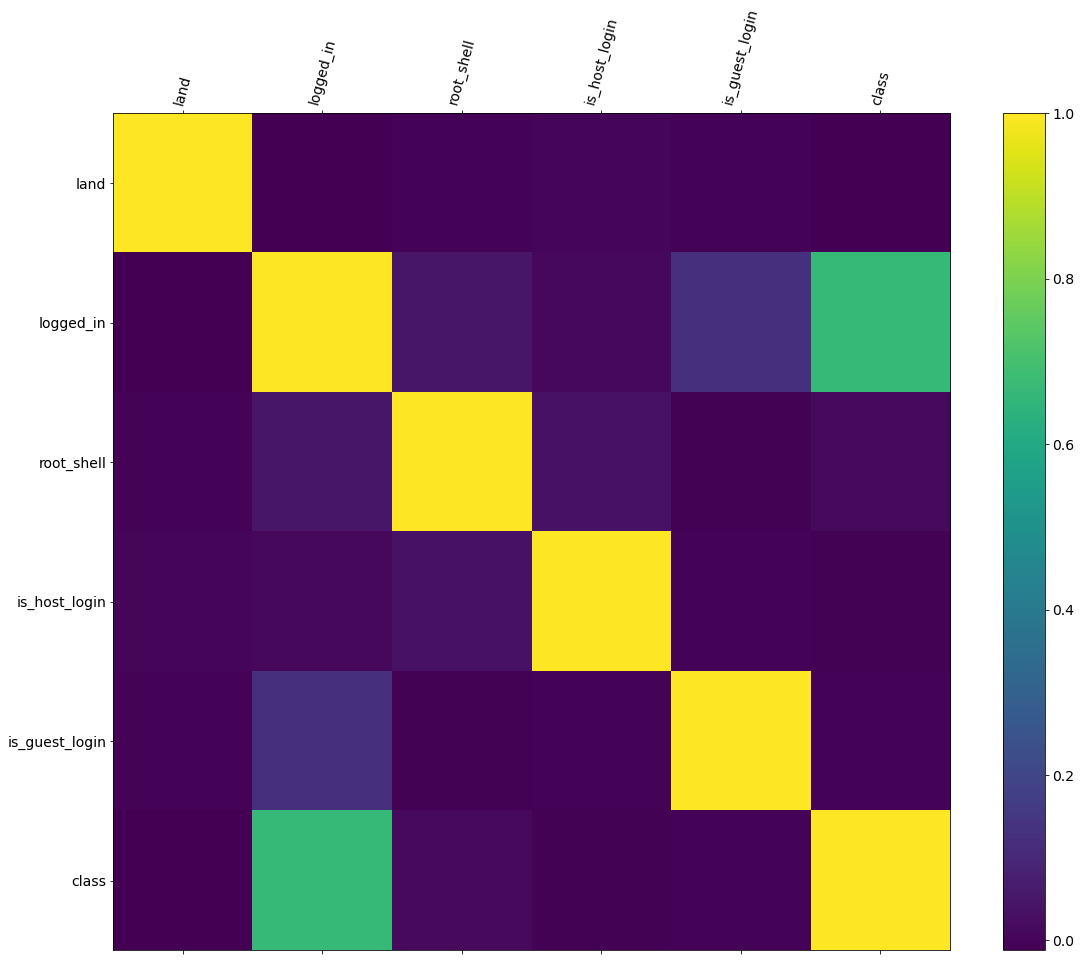

In [154]:
cols = coldict["binary"] + ["class"]
corr_df = onehot_df[cols]
corr_df = corr_df.astype(float)

f = plt.figure(figsize=(19, 15))
plt.matshow(corr_df.corr(), fignum=f.number)
plt.xticks(range(corr_df.shape[1]), cols, fontsize=14, rotation=75)
plt.yticks(range(corr_df.shape[1]), cols, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);

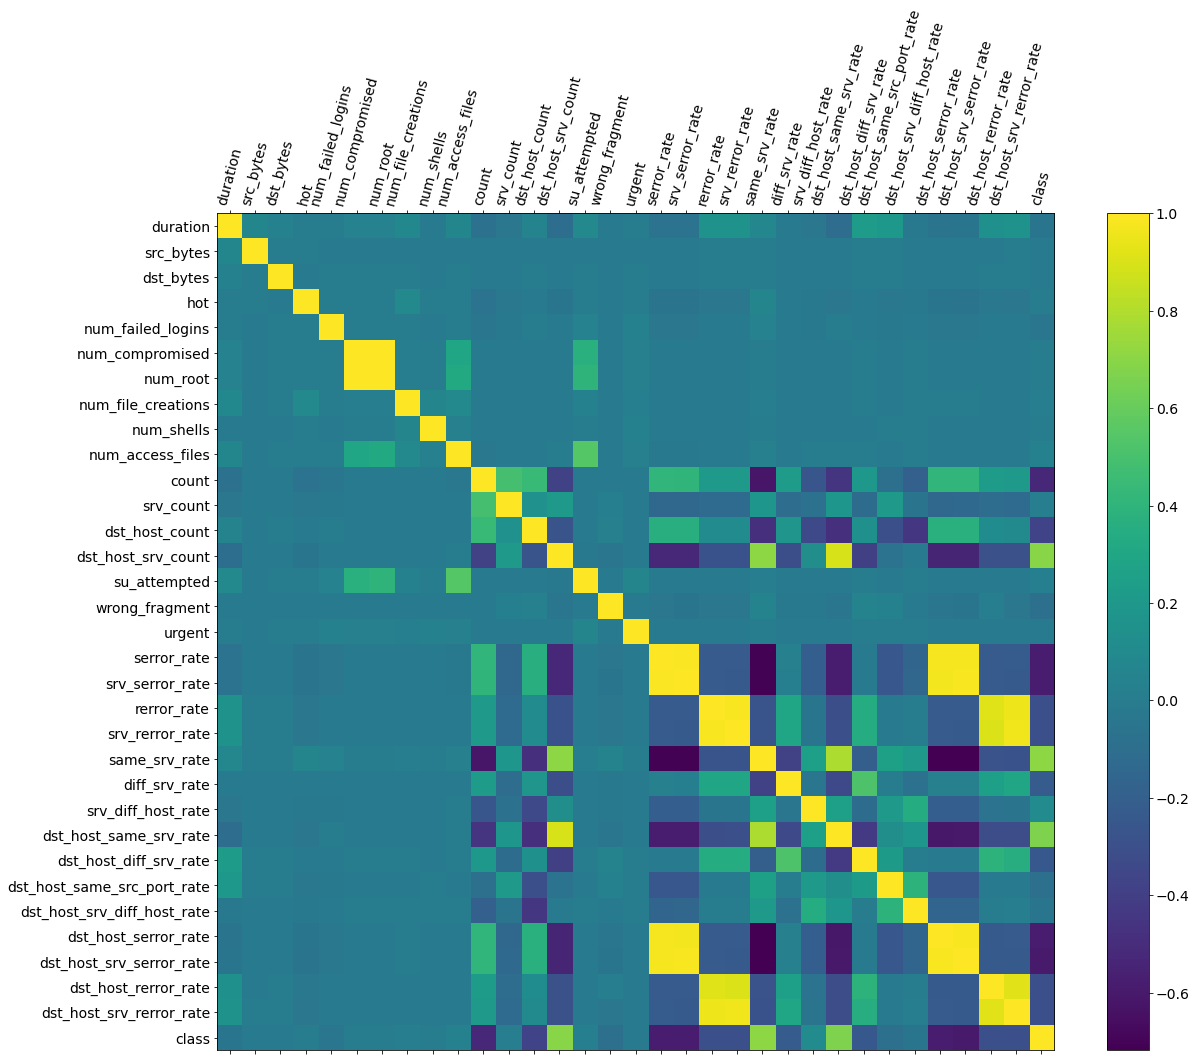

In [155]:
cols = coldict["numerical"] + ["class"]
corr_df = onehot_df[cols].astype(float)

f = plt.figure(figsize=(19, 15))
plt.matshow(corr_df.corr(), fignum=f.number)
plt.xticks(range(corr_df.shape[1]), cols, fontsize=14, rotation=75)
plt.yticks(range(corr_df.shape[1]), cols, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);

In [70]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
corr = corr_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,duration,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,count,srv_count,dst_host_count,dst_host_srv_count,su_attempted,wrong_fragment,urgent,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
duration,1.00,0.07,0.03,0.00,0.00,0.04,0.05,0.08,-0.00,0.07,-0.08,-0.04,0.05,-0.10,0.09,-0.01,0.00,-0.06,-0.06,0.16,0.17,0.07,-0.02,-0.04,-0.10,0.22,0.20,-0.03,-0.05,-0.05,0.14,0.16,-0.05
src_bytes,0.07,1.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,0.01,0.01,0.00,-0.00,-0.00,-0.01,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.01,-0.01
dst_bytes,0.03,0.00,1.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.01,0.01,0.00,-0.00,-0.00,-0.00,0.01,0.01,-0.00,-0.00,-0.00,0.01,0.01,-0.00
hot,0.00,0.00,-0.00,1.00,0.00,0.00,0.00,0.09,0.01,0.00,-0.07,-0.03,-0.01,-0.05,0.00,-0.01,0.01,-0.05,-0.05,-0.03,-0.03,0.07,-0.02,-0.03,-0.04,-0.01,-0.03,-0.02,-0.05,-0.05,-0.03,-0.03,0.01
num_failed_logins,0.00,-0.00,0.00,0.00,1.00,0.01,0.01,0.01,-0.00,0.00,-0.04,-0.02,0.01,-0.01,0.04,-0.01,0.04,-0.03,-0.03,-0.00,-0.00,0.04,-0.02,-0.02,0.00,-0.01,-0.02,-0.01,-0.03,-0.03,-0.01,-0.00,-0.04
num_compromised,0.04,-0.00,0.00,0.00,0.01,1.00,1.00,0.01,0.01,0.30,-0.01,-0.00,-0.01,-0.01,0.37,-0.00,0.03,-0.00,-0.00,-0.00,-0.00,0.01,-0.00,-0.00,-0.01,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.01
num_root,0.05,-0.00,0.00,0.00,0.01,1.00,1.00,0.01,0.01,0.32,-0.01,-0.00,-0.01,-0.01,0.40,-0.00,0.03,-0.01,-0.01,-0.00,-0.00,0.01,-0.00,-0.00,-0.01,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.01
num_file_creations,0.08,-0.00,0.00,0.09,0.01,0.01,0.01,1.00,0.06,0.09,-0.02,-0.01,-0.00,-0.02,0.04,-0.00,0.02,-0.01,-0.01,-0.01,-0.01,0.02,-0.01,-0.01,-0.02,0.01,-0.01,0.00,0.00,0.00,-0.01,-0.01,0.02
num_shells,-0.00,-0.00,-0.00,0.01,-0.00,0.01,0.01,0.06,1.00,0.03,-0.01,-0.01,-0.01,-0.01,0.01,-0.00,0.04,-0.01,-0.01,-0.01,-0.01,0.01,-0.00,-0.01,-0.01,-0.00,0.01,0.00,-0.01,-0.01,-0.00,-0.01,0.00
num_access_files,0.07,-0.00,0.00,0.00,0.00,0.30,0.32,0.09,0.03,1.00,-0.03,-0.01,-0.01,0.00,0.55,-0.00,0.03,-0.02,-0.02,-0.02,-0.01,0.03,-0.01,0.01,0.01,0.00,-0.01,0.00,-0.02,-0.02,-0.01,-0.01,0.04


## Normalization

In [38]:
traindf = onehot_df.loc[onehot_df['train'] == 1]
testdf = onehot_df.loc[onehot_df['train'] == 0]

#train, test = train_test_split(original_df, test_size=0.2)
train = traindf.drop('train',axis=1)
test = testdf.drop('train',axis=1)

In [39]:
from sklearn import preprocessing

scaler = preprocessing.Normalizer()

train[coldict["discrete"]] = scaler.fit_transform(train[coldict["discrete"]])

train

,duration,src_bytes,dst_bytes,land,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,...,su_attempted_0,su_attempted_1,su_attempted_2,wrong_fragment_0,wrong_fragment_1,wrong_fragment_2,urgent_0,urgent_1,urgent_2,urgent_3
0,0.000000,0.122516,0.990694,0,0.000000,0.0,1,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
1,0.000000,0.000000,0.000000,0,0.000000,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
2,0.009394,0.322879,0.946369,0,0.006611,0.0,1,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
3,0.000000,0.000000,0.000000,0,0.000000,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
4,0.008572,0.326657,0.943234,0,0.006735,0.0,1,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118808,0.000000,0.165310,0.943381,0,0.000000,0.0,1,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
118809,0.000000,0.000000,0.000000,0,0.000000,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
118810,0.000000,0.034844,0.000000,0,0.000000,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
118811,0.000000,0.799823,0.000000,0,0.000000,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0


In [40]:
test[coldict["discrete"]] = scaler.transform(test[coldict["discrete"]])

test

,duration,src_bytes,dst_bytes,land,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,...,su_attempted_0,su_attempted_1,su_attempted_2,wrong_fragment_0,wrong_fragment_1,wrong_fragment_2,urgent_0,urgent_1,urgent_2,urgent_3
118813,0.014439,0.999875,0.000018,0,0.0,0.0,1,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
118814,0.000000,0.994624,0.000000,0,0.0,0.0,0,0.0,0,0.0,...,1,0,0,0,1,0,1,0,0,0
118815,0.000000,0.038357,0.997706,0,0.0,0.0,1,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
118816,0.018027,0.270403,0.375989,0,0.0,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
118817,0.000000,0.000000,0.000000,0,0.0,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0.000000,0.051399,0.997544,0,0.0,0.0,1,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
148513,0.000000,0.000000,0.000000,0,0.0,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
148514,0.000000,0.000000,0.000000,0,0.0,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
148515,0.000000,0.227736,0.000000,0,0.0,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0


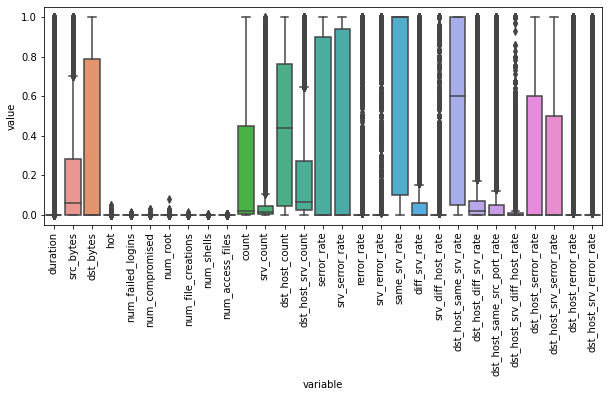

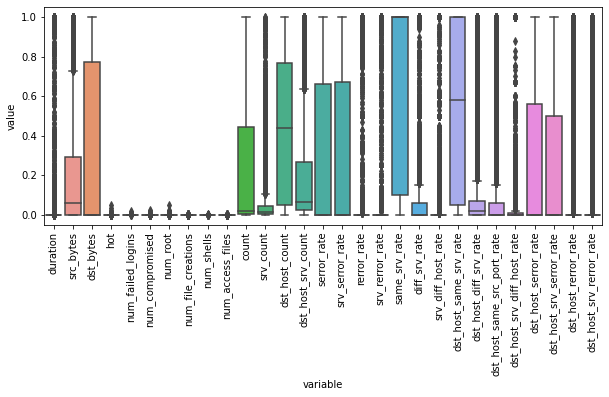

In [41]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))

df = train[coldict["numerical"]]

sns.boxplot(x="variable", y="value", data=pd.melt(df))

index = np.arange(len(df.columns))
plt.xticks(index, df.columns, rotation=90)
plt.savefig("figs/train_before_norm.png", bbox_inches='tight')


#---------#

plt.figure(figsize=(10, 4))

df = test[coldict["numerical"]]

sns.boxplot(x="variable", y="value", data=pd.melt(df))

index = np.arange(len(df.columns))
plt.xticks(index, df.columns, rotation=90)

plt.savefig("figs/test_before_norm.png", bbox_inches='tight')

## Save Treated Dataset

In [42]:
train

,duration,src_bytes,dst_bytes,land,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,...,su_attempted_0,su_attempted_1,su_attempted_2,wrong_fragment_0,wrong_fragment_1,wrong_fragment_2,urgent_0,urgent_1,urgent_2,urgent_3
0,0.000000,0.122516,0.990694,0,0.000000,0.0,1,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
1,0.000000,0.000000,0.000000,0,0.000000,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
2,0.009394,0.322879,0.946369,0,0.006611,0.0,1,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
3,0.000000,0.000000,0.000000,0,0.000000,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
4,0.008572,0.326657,0.943234,0,0.006735,0.0,1,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118808,0.000000,0.165310,0.943381,0,0.000000,0.0,1,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
118809,0.000000,0.000000,0.000000,0,0.000000,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
118810,0.000000,0.034844,0.000000,0,0.000000,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
118811,0.000000,0.799823,0.000000,0,0.000000,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0


In [43]:
test

,duration,src_bytes,dst_bytes,land,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_root,...,su_attempted_0,su_attempted_1,su_attempted_2,wrong_fragment_0,wrong_fragment_1,wrong_fragment_2,urgent_0,urgent_1,urgent_2,urgent_3
118813,0.014439,0.999875,0.000018,0,0.0,0.0,1,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
118814,0.000000,0.994624,0.000000,0,0.0,0.0,0,0.0,0,0.0,...,1,0,0,0,1,0,1,0,0,0
118815,0.000000,0.038357,0.997706,0,0.0,0.0,1,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
118816,0.018027,0.270403,0.375989,0,0.0,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
118817,0.000000,0.000000,0.000000,0,0.0,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0.000000,0.051399,0.997544,0,0.0,0.0,1,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
148513,0.000000,0.000000,0.000000,0,0.0,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
148514,0.000000,0.000000,0.000000,0,0.0,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0
148515,0.000000,0.227736,0.000000,0,0.0,0.0,0,0.0,0,0.0,...,1,0,0,1,0,0,1,0,0,0


In [44]:
train.to_pickle('train_treated.pkl')
test.to_pickle('test_treated.pkl')

del onehot_df
del train
del test
del merged_df

# Feature Selection


## ExtraTree classifier

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import matplotlib.pyplot as plt

#-----------------------------------------
def extraTreeRank(df):

  # Divide train set and test set
  X = df[df.columns.difference(["class"])]
  Y = df[["class"]] 

  # Build the forest
  clf = ExtraTreesClassifier(n_estimators=100)
  clf = clf.fit(X, Y)

  # Get the importance of each feature
  zipped = zip(list(X.columns), list(clf.feature_importances_))
  importances = dict(zipped)

  # Build the selection object
  model = SelectFromModel(clf, prefit=True)

  # Get the selected columns
  selected_names = X.columns[model.get_support()]

  # Couple each selected column with its importance 
  selected_zipped = [ [name, importances[name]] for name in selected_names]

  # Sort by importance
  selected_zipped = sorted(selected_zipped, key=lambda kv: kv[1], reverse=True)

  # Plot
  plt.figure()
  plt.bar([x[0] for x in selected_zipped],[x[1] for x in selected_zipped] )
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.savefig("figs/extratree.png", bbox_inches='tight')

  return selected_names

<ipython-input-6-6079225ef07c>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X, Y)


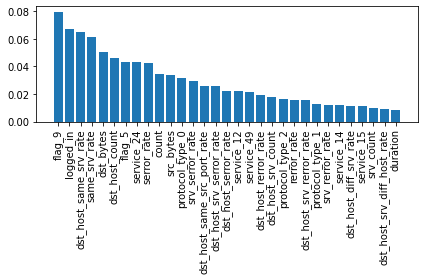

In [7]:
df = pd.read_pickle('train_treated.pkl')
extraTreeCols = extraTreeRank(df)

## Univariate Selection

In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif, mutual_info_classif

def univariateSel(df, N_SELECTED):
  # divide target from dataset
  X = df[df.columns.difference(["class"])]
  Y = df[["class"]]
  
  #apply SelectKBest class to extract top N best features
  bestfeatures = SelectKBest(score_func=chi2, k=N_SELECTED)
  fit = bestfeatures.fit(X,Y)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X.columns)

  #concat two dataframes for better visualization 
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  featureScores.columns = ['Column','Importance']  #naming the dataframe columns

  sorted = featureScores.sort_values('Importance', ascending=0)

  plt.figure()
  plt.bar(sorted["Column"][:N_SELECTED],sorted["Importance"][:N_SELECTED] )
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.savefig("figs/univariate.png", bbox_inches='tight')

  print("\nSelected Features:\n")
  print(featureScores.nlargest(N_SELECTED,'Importance'))  #print 10 best features

  return featureScores.nlargest(N_SELECTED,'Importance').Column


Selected Features:

                       Column    Importance
29                  logged_in  31208.289702
12   dst_host_srv_serror_rate  30891.993515
20                     flag_5  30737.315415
117           srv_serror_rate  30064.884475
42                serror_rate  29972.204685
8        dst_host_serror_rate  29735.089077
2                   dst_bytes  28763.662417
60                 service_24  25881.938173
24                     flag_9  24824.006471
7      dst_host_same_srv_rate  19890.348661
0                       count  17451.405140
87                 service_49  17271.219661
41              same_srv_rate  16898.142096
3              dst_host_count  13511.225621
116           srv_rerror_rate   8858.226859
39                rerror_rate   8855.313014
11   dst_host_srv_rerror_rate   8609.364976
5        dst_host_rerror_rate   8161.919674
47                 service_12   7389.041523
113                 src_bytes   5824.904087
15                     flag_1   5420.932468
38         

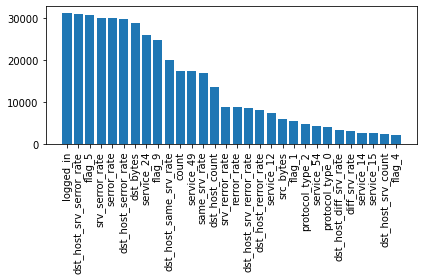

In [9]:
traindf = pd.read_pickle('train_treated.pkl')
univariateCols = univariateSel(traindf, 30)

## Print difference

In [10]:
set(extraTreeCols) ^ set(univariateCols)

{'diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'duration',
 'flag_1',
 'flag_4',
 'protocol_type_1',
 'service_54',
 'srv_count'}

# Keras Functions

Functions used to build, evaluate and display the results of a given neural network.


## Training


In [11]:
## --------------------------------------------------------------
def saveModel(model, filename):
    """
    Save trained model and weights to a file for future analysis.
    """
    # save model
    model_json = model.to_json()
    with open("models/" + filename + ".json", "w+") as json_file:
        json_file.write(model_json)
        
    # save weights
    model.save_weights("models/" + filename + ".h5")
    print("Saved model " + filename + " to disk")

In [12]:
##---------------------------------------------------##
##    Keras Model: create, train and test the NN     ##
##---------------------------------------------------##
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

## --------------------------------------------------------------
def buildModel(train_X, train_Y, val_X, val_Y, N_SELECTED, nodes, EPOCHS=150, BATCH=16):
  print("\nBuilding model %d features, epochs=%d batch_size=%d" % (N_SELECTED, EPOCHS, BATCH))
  print("Shape:")
  for n in nodes:
    print(n["neurons"])

  model = Sequential()

  # Input layer
  model.add(Dense(nodes[0]["neurons"], input_dim=N_SELECTED, activation=nodes[0]["activation"]))
  if nodes[0]["dropout"] > 0:
    model.add(Dropout(nodes[0]["dropout"]))

  # Hidden layers
  if len(nodes) > 1:
    for n in nodes[1:]:
      model.add(Dense(n["neurons"], activation=n["activation"]))
      if n["dropout"] > 0:
        model.add(Dropout(n["dropout"]))

  # Output layer
  model.add(Dense(1, activation='sigmoid'))

  # Compile the keras model
  opt = Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

  # fit the keras model on the dataset
  history = model.fit(train_X, train_Y, epochs=EPOCHS, batch_size=BATCH, validation_split=0.15, verbose = 0)

  # save trained model
  name = "model_" + str(N_SELECTED) + "feat"
  for n in nodes:
    name += "_" + str(n["neurons"])

  saveModel(model, name)

  return model, history

### Training History


In [14]:
## --------------------------------------------------------------
def plotHistory(history):
  # list all data in history
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'dev'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'dev'], loc='upper left')
  plt.show()

## Evaluation

In [13]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as  sns

## --------------------------------------------------------------
def predictAndEvaluate(model, test_X, test_Y):
    """
    Return confusion matrix between predictions and actual values.
    """

    # predict
    predictions = model.predict(test_X)

    # print confusion matrix
    y_test = (test_Y > 0.5)
    y_pred = (predictions > 0.5)
    matrix = metrics.confusion_matrix(test_Y, y_pred)
    matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    #matrix = metrics.confusion_matrix(test_Y, y_pred)
    #matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    
    matrix = pd.DataFrame(matrix)

    print(matrix)

## Run Model (divide target from variables, build model, evaluate model, print history)


In [15]:
import pandas as pd

## --------------------------------------------------------------
def runModel(train, test, selected_cols, nodes, epochs=150):
  train_X = train[selected_cols]
  train_X = np.asarray(train_X).astype('float32')
  train_Y = train[["class"]]

  test_X = test[selected_cols]
  test_X = np.asarray(test_X).astype('float32')
  test_Y = test[["class"]]

  val_X = test[selected_cols].head(5000)
  val_X = np.asarray(test_X).astype('float32')
  val_Y = test[["class"]]

  # train
  model, history = buildModel(train_X, train_Y, val_X, val_Y, len(selected_cols), nodes, epochs, 10)

  # evaluate
  plotHistory(history)

  print('\nEvaluation on Train Set\n')
  predictAndEvaluate(model, train_X, train_Y)
  print('\nEvaluation on Test Set\n')
  predictAndEvaluate(model, test_X, test_Y)

## Load train/test set

In [19]:
train = pd.read_pickle('train_treated.pkl')
test  = pd.read_pickle('test_treated.pkl')   

allcols =  train.columns.difference(["class"])

# runModel(train, test, train.columns[0:121], 30, 10, 0, 50)

## Shallow (2 layers)

In [18]:
runModel(train, test, allcols, [{"neurons":30, "activation":"relu", "dropout":0},
                                {"neurons":10, "activation":"relu", "dropout":0}], 50)
runModel(train, test, allcols, [{"neurons":30, "activation":"relu", "dropout":0},
                                {"neurons":10, "activation":"tanh", "dropout":0}], 50)
runModel(train, test, allcols, [{"neurons":30, "activation":"relu", "dropout":0},
                                {"neurons":10, "activation":"sigmoid", "dropout":0}], 50)

NameError: name 'allcols' is not defined

## Dropout


Building model 128 features, epochs=150 batch_size=10
Shape:
30
10
Saved model model_128feat_30_10 to disk
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


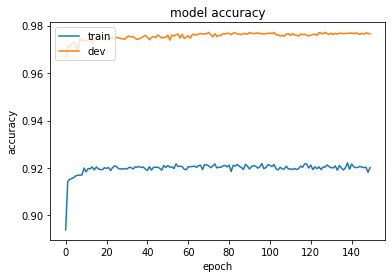

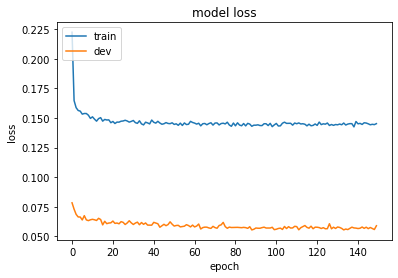


Evaluation on Train Set

          0         1
0  0.955034  0.044966
1  0.005802  0.994198

Evaluation on Test Set

          0         1
0  0.954504  0.045496
1  0.008794  0.991206

Building model 128 features, epochs=150 batch_size=10
Shape:
30
10
Saved model model_128feat_30_10 to disk
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


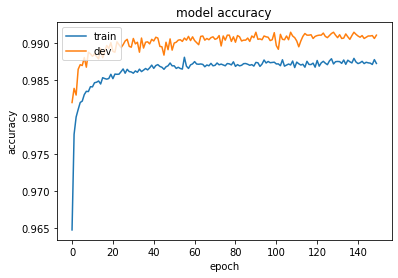

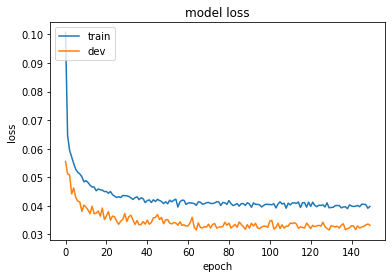


Evaluation on Train Set

          0         1
0  0.989021  0.010979
1  0.004781  0.995219

Evaluation on Test Set

          0         1
0  0.988992  0.011008
1  0.006840  0.993160


In [67]:
runModel(train, test, allcols, [{"neurons":30, "activation":"relu", "dropout":0.8},
                                {"neurons":10, "activation":"tanh", "dropout":0.5}], 150)
runModel(train, test, allcols, [{"neurons":30, "activation":"relu", "dropout":0.5},
                                {"neurons":10, "activation":"tanh", "dropout":0.2
                                }], 150)


Building model 128 features, epochs=150 batch_size=10
Shape:
30
15
Saved model model_128feat_30_15 to disk
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


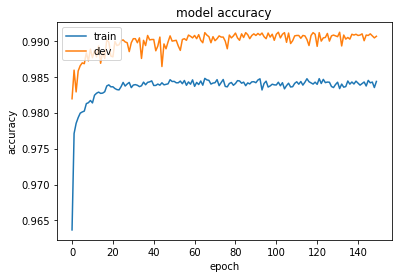

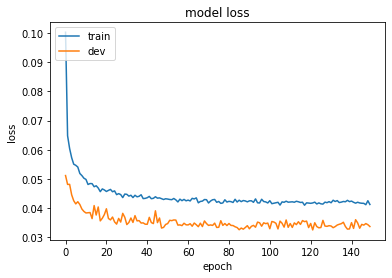


Evaluation on Train Set

          0         1
0  0.987620  0.012380
1  0.004424  0.995576

Evaluation on Test Set

          0         1
0  0.987459  0.012541
1  0.006970  0.993030


In [22]:
runModel(train, test, allcols, [{"neurons":30, "activation":"relu", "dropout":0.5},
                                {"neurons":15, "activation":"tanh", "dropout":0.3
                                }], 150)

## Add layers


Building model 128 features, epochs=150 batch_size=10
Shape:
80
30
10
Saved model model_128feat_80_30_10 to disk
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


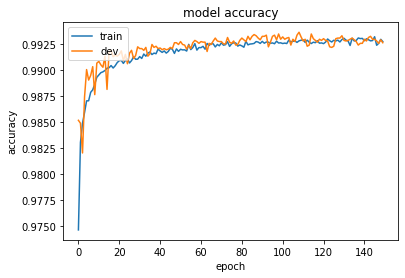

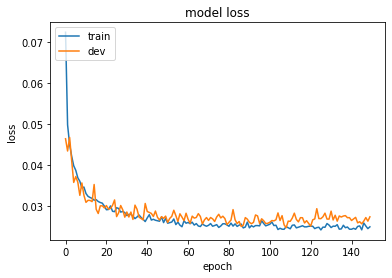


Evaluation on Train Set

          0         1
0  0.992068  0.007932
1  0.004100  0.995900

Evaluation on Test Set

          0         1
0  0.991012  0.008988
1  0.007101  0.992899

Building model 128 features, epochs=150 batch_size=10
Shape:
80
30
30
10
Saved model model_128feat_80_30_30_10 to disk
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


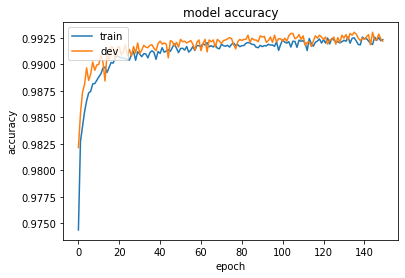

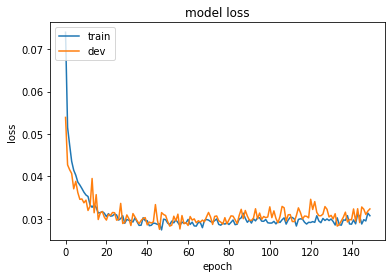


Evaluation on Train Set

          0         1
0  0.991262  0.008738
1  0.003792  0.996208

Evaluation on Test Set

          0         1
0  0.990873  0.009127
1  0.006123  0.993877


In [20]:
runModel(train, test, allcols, [{"neurons":80, "activation":"relu", "dropout":0.3},
                                {"neurons":30, "activation":"tanh", "dropout":0.1},
                                {"neurons":10, "activation":"tanh", "dropout":0.1}], 150)
runModel(train, test, allcols, [{"neurons":80, "activation":"relu", "dropout":0.3},
                                {"neurons":30, "activation":"tanh", "dropout":0.1},
                                {"neurons":30, "activation":"tanh", "dropout":0.1},
                                {"neurons":10, "activation":"tanh", "dropout":0.1}], 150) 

## Selected features


Building model 31 features, epochs=150 batch_size=10
Shape:
30
10
Saved model model_31feat_30_10 to disk
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


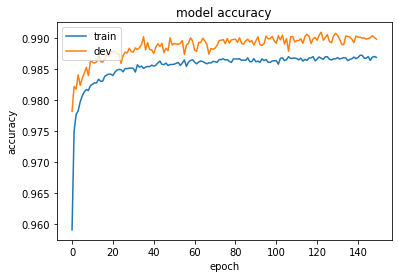

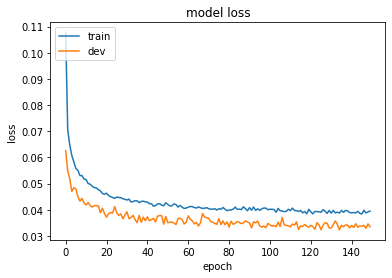


Evaluation on Train Set

          0         1
0  0.988146  0.011854
1  0.006742  0.993258

Evaluation on Test Set

          0         1
0  0.987529  0.012471
1  0.010097  0.989903

Building model 31 features, epochs=150 batch_size=10
Shape:
30
30
10
Saved model model_31feat_30_30_10 to disk
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


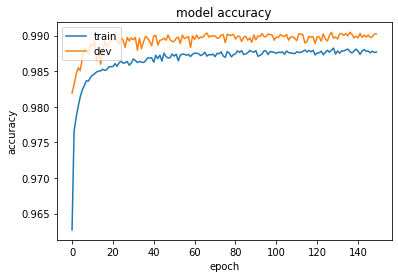

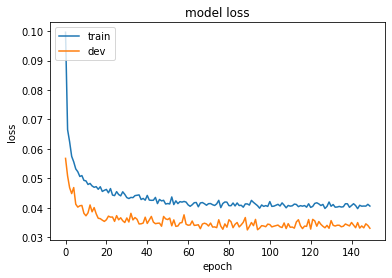


Evaluation on Train Set

          0         1
0  0.989546  0.010454
1  0.006531  0.993469

Evaluation on Test Set

          0         1
0  0.989549  0.010451
1  0.009315  0.990685

Building model 30 features, epochs=150 batch_size=10
Shape:
30
10
Saved model model_30feat_30_10 to disk
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


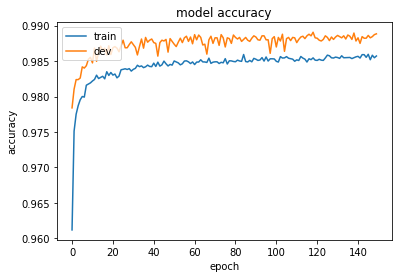

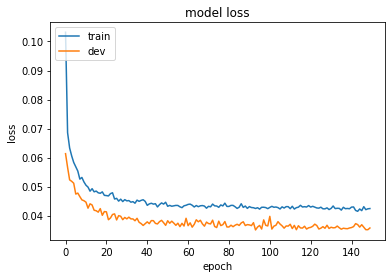


Evaluation on Train Set

          0         1
0  0.988688  0.011312
1  0.010000  0.990000

Evaluation on Test Set

          0         1
0  0.989201  0.010799
1  0.012116  0.987884

Building model 30 features, epochs=150 batch_size=10
Shape:
30
30
10
Saved model model_30feat_30_30_10 to disk
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


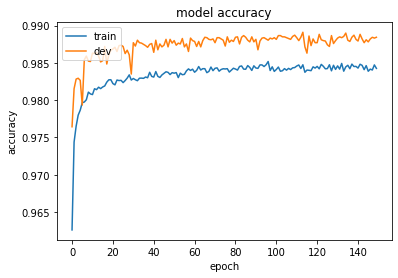

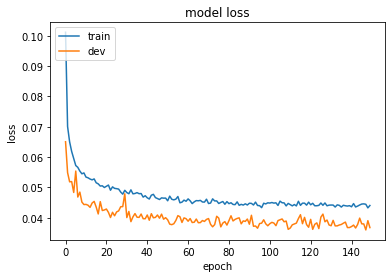


Evaluation on Train Set

          0         1
0  0.990002  0.009998
1  0.010972  0.989028

Evaluation on Test Set

          0         1
0  0.989758  0.010242
1  0.013875  0.986125


In [23]:
runModel(train, test, extraTreeCols, [{"neurons":30, "activation":"relu", "dropout":0.3},
                                {"neurons":10, "activation":"tanh", "dropout":0.1}], 150)
                                
runModel(train, test, extraTreeCols, [{"neurons":30, "activation":"relu", "dropout":0.3},
                                {"neurons":30, "activation":"tanh", "dropout":0.1},
                                {"neurons":10, "activation":"tanh", "dropout":0.1}], 150)

runModel(train, test, univariateCols, [{"neurons":30, "activation":"relu", "dropout":0.3},
                                {"neurons":10, "activation":"tanh", "dropout":0.1}], 150)
                                
runModel(train, test, univariateCols

, [{"neurons":30, "activation":"relu", "dropout":0.3},
                                {"neurons":30, "activation":"tanh", "dropout":0.1},
                                {"neurons":10, "activation":"tanh", "dropout":0.1}], 150)

# Run Models

In [11]:
import random
import pandas as pd

random.seed(10)

# load dataset
train = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/third_try/train_treated.pkl')
test  = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/third_try/test_treated.pkl')

'class_normal' in train.columns[0:121]

False

In [12]:
'class_anomaly' in train.columns[0:121]

False

## All Features


Building model [10 0] with 121 features, epochs=150 batch_size=10
Saved model model_10_0_121feat to disk
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


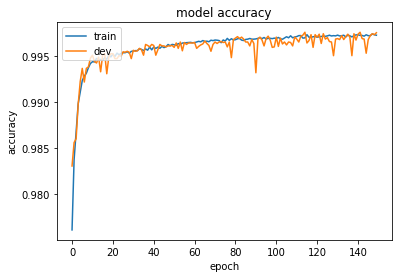

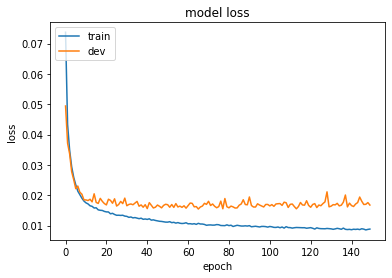


Evaluation on Train Set

          0         1
0  0.997100  0.002900
1  0.001916  0.998084

Evaluation on Test Set

          0         1
0  0.679186  0.320814
1  0.082072  0.917928

Building model [20 0] with 121 features, epochs=150 batch_size=10
Saved model model_20_0_121feat to disk
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


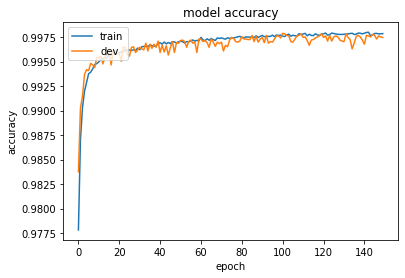

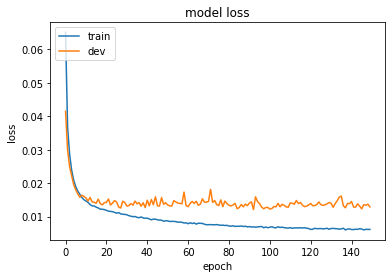


Evaluation on Train Set

          0         1
0  0.997902  0.002098
1  0.001856  0.998144

Evaluation on Test Set

          0         1
0  0.729214  0.270786
1  0.039955  0.960045

Building model [30 0] with 121 features, epochs=150 batch_size=10


In [ ]:


# select
selected_cols = train.columns[0:121]

# run models
runModel(train, test, selected_cols, 10, 0)
runModel(train, test, selected_cols, 20, 0)
runModel(train, test, selected_cols, 30, 0)
runModel(train, test, selected_cols, 80, 0)

runModel(train, test, selected_cols, 80, 30)
runModel(train, test, selected_cols, 50, 10)

## Extra Tree Ranked Features

In [ ]:
# select
selected_cols = extraTreeRank(train, 80)

# run models
runModel(train, test, selected_cols, 10, 0)
runModel(train, test, selected_cols, 30, 10)

# select
selected_cols = extraTreeRank(train, 40)

# run models
runModel(train, test, selected_cols, 10, 0)
runModel(train, test, selected_cols, 30, 10)

# select
selected_cols = extraTreeRank(train, 15)

# run models
runModel(train, test, selected_cols, 8, 0)
runModel(train, test, selected_cols, 4, 0)

## Univariate Selected Features

In [ ]:
# select
selected_cols = univariateSel(train, 80)

# run models
runModel(train, test, selected_cols, 10, 0)
runModel(train, test, selected_cols, 30, 10)

# select
selected_cols = univariateSel(train, 40)

# run models
runModel(train, test, selected_cols, 10, 0)
runModel(train, test, selected_cols, 30, 10)

# select
selected_cols = univariateSel(train, 15)

# run models
runModel(train, test, selected_cols, 8, 0)
runModel(train, test, selected_cols, 4, 0)

- 1,2,3 layers
- relu/tanh
- selected features
- dropout
- change metric?
    - AUC
    - true positives/negatives?

# Neural Network design

As a preliminary step, we tried out various depths to get a grip on the actual capabilities of a Neural Network
- "relu" for middle nodes
- no dropout
- no feature selection

## Dropout regularization

For each of the neural networks, we added dropout regularization layers

## Change activation function

Middle layers with tanh/sigmoid

## Feature selection

We selected top K features 

